# Insurance Claims Charges Prediction

### STEP-1: Importing Libraries & Dataset

In this step, we begin by importing the essential libraries required for our analysis or model-building process. These libraries provide pre-built functions and tools to simplify tasks like data manipulation, visualization, and computation.

We also load the dataset, which serves as the foundation of our project. Ensuring the dataset is correctly imported is crucial, as it allows us to proceed with exploratory data analysis and modeling seamlessly. This step sets the stage for understanding and utilizing the data effectively.

In [ ]:
#import basic libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Read the Data
insdata = pd.read_csv('/insurance.csv')

### STEP-2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step where we delve into the dataset to understand its structure, patterns, and anomalies. In this phase, we examine the data types, summarize key statistics, and visualize distributions and relationships.

The goal is to identify trends, correlations, or potential issues like missing values and outliers. This analysis not only enhances our understanding of the dataset but also guides our decisions for preprocessing and feature engineering in subsequent steps.

In [ ]:
insdata.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print('Dimensions: {} Rows and {} Columns '.format(insdata.shape[0], insdata.shape[1]))

Dimensions: 1338 Rows and 7 Columns 


In [ ]:
# Descriptive stats

insdata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# dataset information

insdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insdata.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
insdata['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
#insdata.corr()

#### Visualizations

Text(0.5, 1.0, 'Age vs Charges')

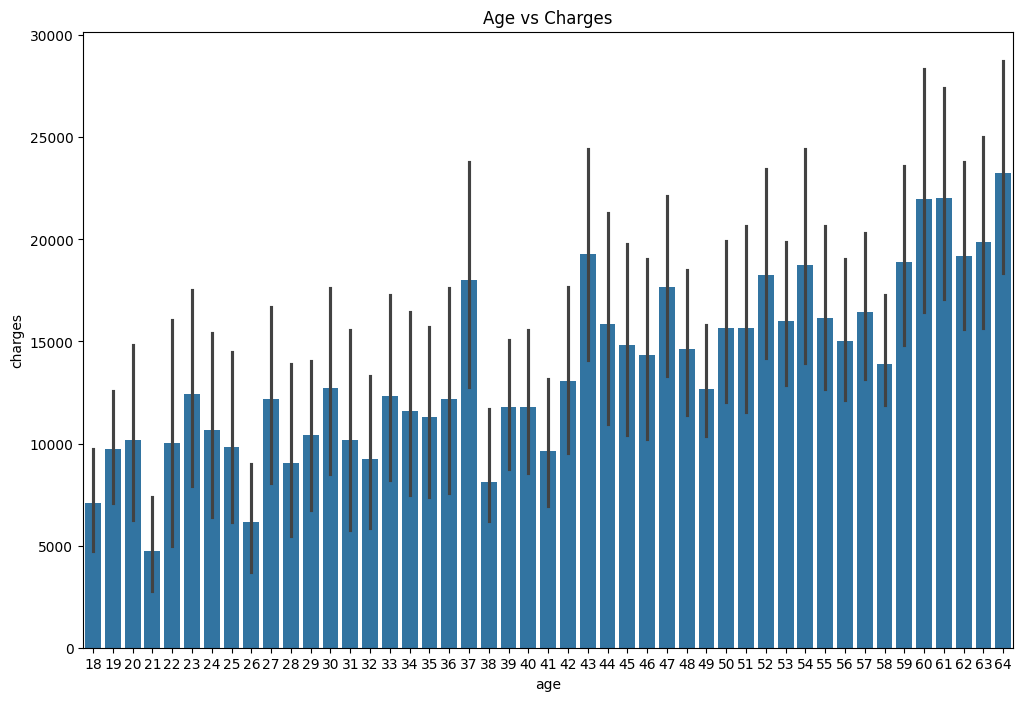

In [ ]:
# Age vs Charges
# the more the age the more will be insurance charge

plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = insdata)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

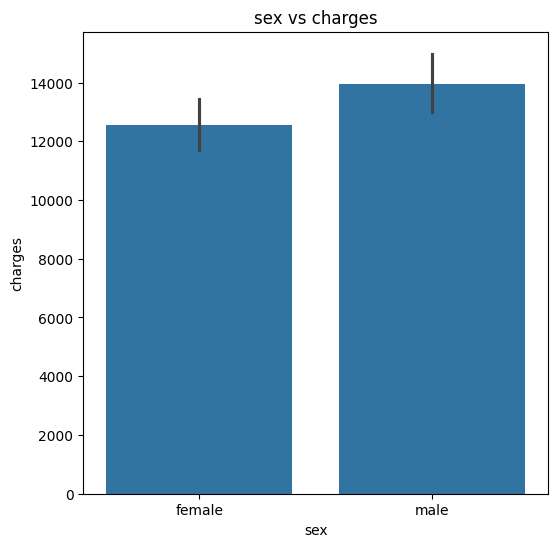

In [ ]:
# sex vs charges
# males insurance charges more than females.

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = insdata)

plt.title('sex vs charges')

Text(0.5, 1.0, 'smoker vs charges')

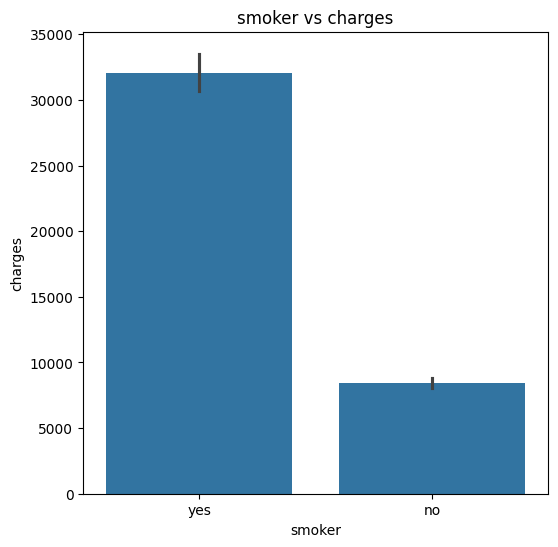

In [ ]:
# smoker vs charges
# smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = insdata)

plt.title('smoker vs charges')

Text(0.5, 1.0, 'region vs charges')

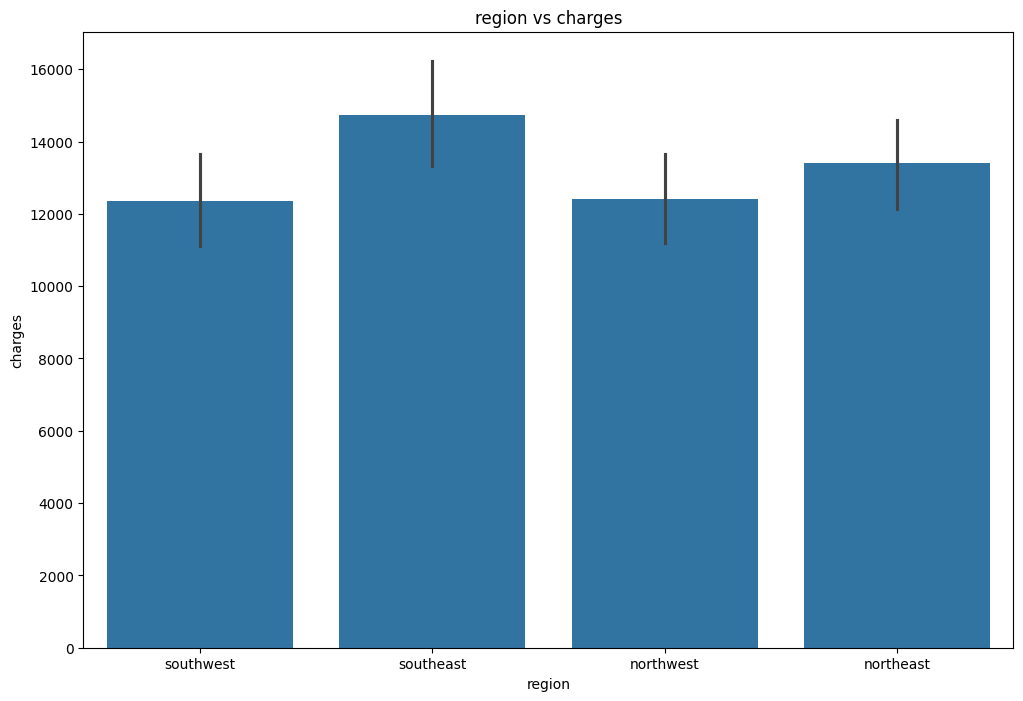

In [ ]:
# region vs charges
# region actually does not play any role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = insdata)

plt.title('region vs charges')

### STEP-3: Data Preprocessing / Cleaning the Data

Data preprocessing is a vital step where we prepare the dataset for analysis or modeling by addressing inconsistencies and enhancing data quality. This involves handling missing values, removing duplicates, dealing with outliers, and transforming data into a consistent format.

We may also normalize or standardize numerical values, encode categorical variables, and split the dataset into training and testing sets if needed. Cleaning the data ensures that our analysis or model is built on a reliable foundation, leading to more accurate and meaningful results.

In [ ]:
# removing unnecassary columns from the dataset

insdata = insdata.drop('region', axis = 1)

print(insdata.shape)
insdata.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [ ]:
# Label Encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
insdata['sex'] = le.fit_transform(insdata['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
insdata['smoker'] = le.fit_transform(insdata['smoker'])

In [ ]:
insdata['sex'].value_counts()

,count
sex,
1,676
0,662


In [ ]:
insdata['smoker'].value_counts()

,count
smoker,
0,1064
1,274


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Ensure there are no missing values (optional, depending on your dataset)
df =insdata.dropna()

# Define features (X) and target (y)
target_column = 'target_column'  # Replace with the actual target column name
X = insdata.drop(columns=[])  # Features
y = insdata['charges']  # Target variable

# Ensure both X and y have the same number of rows
print("Original shape of X:", X.shape)
print("Original shape of y:", y.shape)

# Randomly sample 100 samples from X and y (make sure they have the same random seed for reproducibility)
X_sampled = X.sample(n=100, random_state=1)
y_sampled = y.loc[X_sampled.index]  # Ensure y is aligned with X_sampled





Original shape of X: (1338, 6)
Original shape of y: (1338,)


In [ ]:
X.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
print(X.shape)
X.sample(5)

(1338, 6)


,age,sex,bmi,children,smoker,charges
99,38,1,19.300,0,1,15820.69900
505,37,1,30.875,3,0,6796.86325
227,58,0,41.910,0,0,24227.33724
106,19,0,28.400,1,0,2331.51900
449,35,1,38.600,1,0,4762.32900


In [ ]:
print(y.shape)
y.tail(5)

(1338,)


,charges
1333,10600.5483
1334,2205.9808
1335,1629.8335
1336,2007.9450
1337,29141.3603


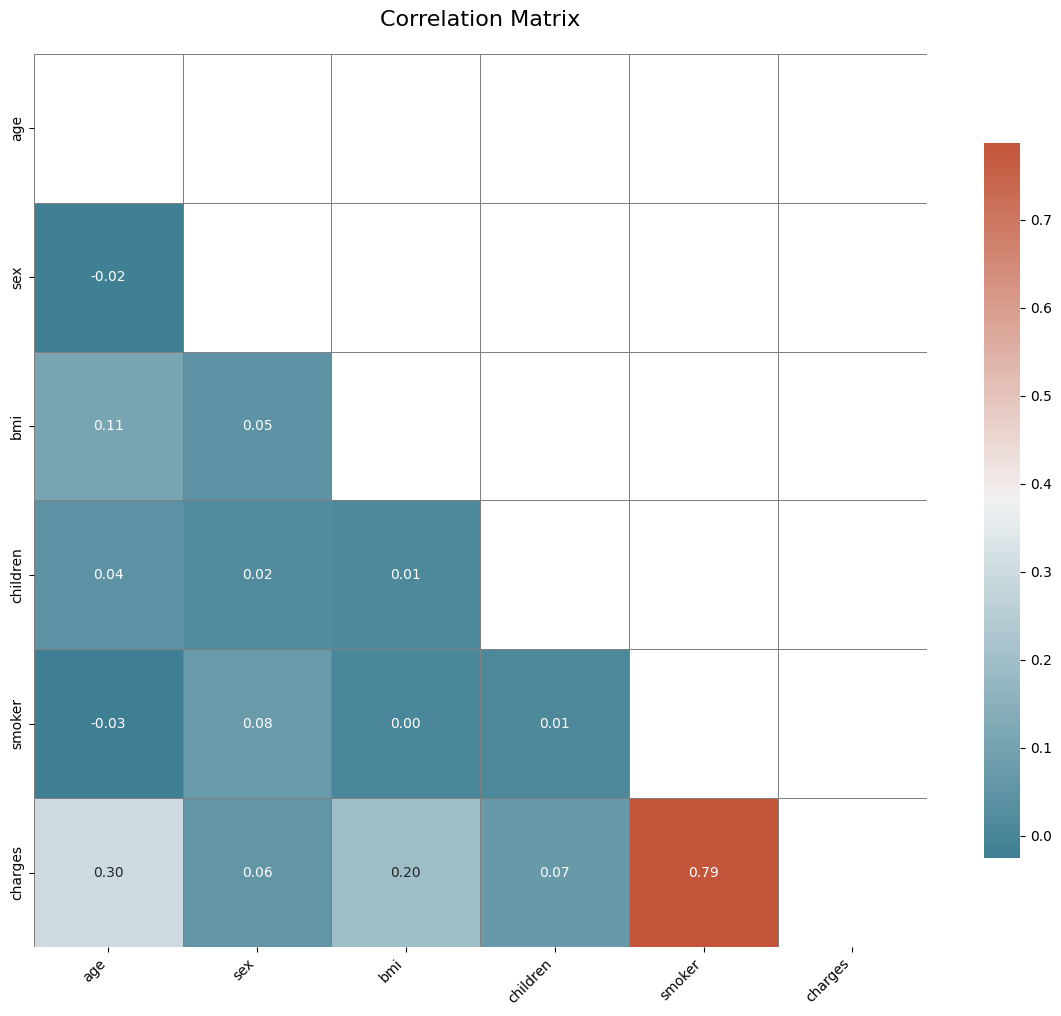

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Assuming 'insdata' is the DataFrame containing your data
# Example: insdata = pd.read_csv('insurance.csv')

# Plotting the correlation heatmap
f, ax = plt.subplots(figsize=(12, 10))  # Increased figure size for better visibility

# Compute the correlation matrix
corr = insdata.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    square=True,
    annot=True,      # Annotate the heatmap with correlation values
    fmt=".2f",       # Format the numbers to 2 decimal places
    annot_kws={"size": 10},  # Control font size of annotations
    cbar_kws={"shrink": 0.8},  # Shrink colorbar size for better fit
    linewidths=0.5,  # Add lines between boxes
    linecolor='gray',  # Set line color
    ax=ax
)

# Customize axes ticks and labels
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels
plt.yticks(fontsize=10)  # Adjust y-axis label size

# Add a title
plt.title("Correlation Matrix", fontsize=16, pad=20)  # Title with padding

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


#### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


### STEP-4: Fit the Model, Predict, and Check Accuracy

In this step, we train our machine learning model by fitting it to the processed dataset. The model learns patterns and relationships from the training data to make predictions on unseen data.

After training, we test the model's performance using the test dataset, measuring its accuracy and other evaluation metrics like precision, recall, or F1-score. This step helps us assess how well the model generalizes to new data and guides further tuning or improvements for better results.

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

from math import sqrt

# creating the model
lrmodel = LinearRegression()

# feeding the training data to the model
lrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = lrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  3.7718124172118307e-23
RMSE:  6.141508297814007e-12
R2 : 1.0


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVR

# creating the model
svrmodel = SVR()

# feeding the training data to the model
svrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = svrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  162659350.0494204
RMSE:  12753.797475631342
R2 : -0.08962120254979311


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dtrmodel = DecisionTreeRegressor()

# feeding the training data to the model
dtrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = dtrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  116232.98079794779
RMSE:  340.92958334229047
R2 : 0.9992213794025703


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
#rfrmodel = RandomForestRegressor()
rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  281066.2666100702
RMSE:  530.1568320884587
R2 : 0.9981171954558604
